Structured data is data that has a standardized format, or in simple words: a table or an ordered file

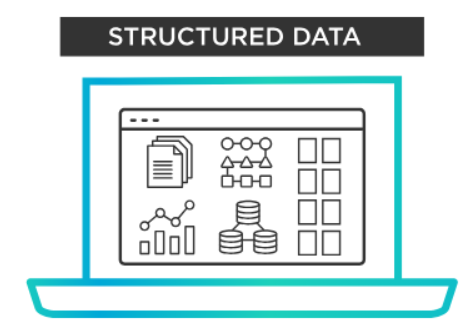

<h4> Pandas (http://pandas.pydata.org/) is Python's hybrid equivalent to SQL and Excel. It provides a unified API for many data-related operations, including manipulation, I/O, indexing, alignment, vizualizations, pivoting, grouping, and so on. Lets see how it works.


First thing: Import pandas

In [ ]:
import pandas as pd
import numpy as np

The primary two components of pandas are the Series and DataFrame. A Series is a column, and a DataFrame is a multi-dimensional table made up of a collection of Series

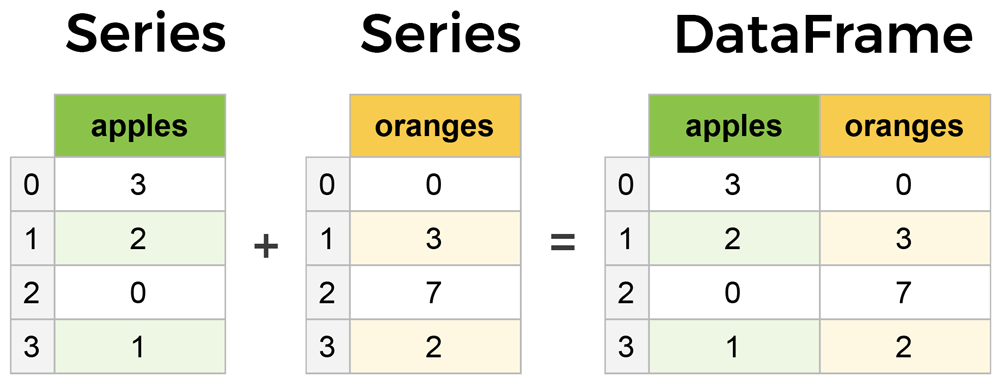

The two are quite similar, many of the operations that you can do with DataFrames you can do with Series

### Import
How to create a dataframe?

Many options..

OpI: create from dictionary

In [ ]:
df = pd.DataFrame({
    'apples': [3, 2, 0, 1],
    'bananas': [0, 3, 7, 2]
})

Each (key, value) item in data corresponds to a column in the resulting DataFrame.

The Index of this DataFrame was given to us on creation as the numbers 0-3, but we could also create our own

OpII: Read data from file

In [ ]:
# read from csv file
pd.read_csv('xxx.csv', index_col='name') # many options, check doc.
# or other formats like json
df = pd.read_json('xxx.json')

CSV= comma separated values ;
JSON =  JavaScript Object Notation

In [ ]:
# employee.json
 {
    "employee": {
        "name":       "XXX",
        "salary":     10000,
        "married":    1,
        "children":   2
    }
}

{'employee': {'name': 'XXX', 'salary': 100000, 'married': 1, 'children': 2}}

In [ ]:
# save to csv:
# df.to_csv('employees.csv')
# # save to json:
# df.to_json('employees.json')

define index and header:

### Explore
Inspect the data

In [ ]:
movies_df = pd.read_csv('imdb_1000.csv', index_col='title', header = 0)

In [ ]:
movies_df.head(8) #tail()

,star_rating,content_rating,genre,duration,actors_list
title,,,,,
The Shawshank Redemption,9.3,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
The Godfather,9.2,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
The Godfather: Part II,9.1,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
The Dark Knight,9.0,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Pulp Fiction,8.9,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
12 Angry Men,8.9,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
"The Good, the Bad and the Ugly",8.9,NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
The Lord of the Rings: The Return of the King,8.9,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."


In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 979 entries, The Shawshank Redemption to Wall Street
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   content_rating  976 non-null    object 
 2   genre           979 non-null    object 
 3   duration        979 non-null    int64  
 4   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 45.9+ KB


In [ ]:
movies_df.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [ ]:
# check the number of rows and columns
movies_df.shape # output: tuple - (#rows, #columns)

(979, 5)

In [ ]:
# check the data type of each column
movies_df.dtypes

,0
star_rating,float64
content_rating,object
genre,object
duration,int64
actors_list,object


One column quick exploration:

In [ ]:
movies_df.genre.count()

979

In [ ]:
movies_df.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [ ]:
movies_df.genre.nunique()

16

In [ ]:
movies_df.genre.value_counts()

,count
genre,
Drama,278
Comedy,156
Action,136
Crime,124
Biography,77
Adventure,75
Animation,62
Horror,29
Mystery,16


You can easily plot:

<Axes: xlabel='genre'>

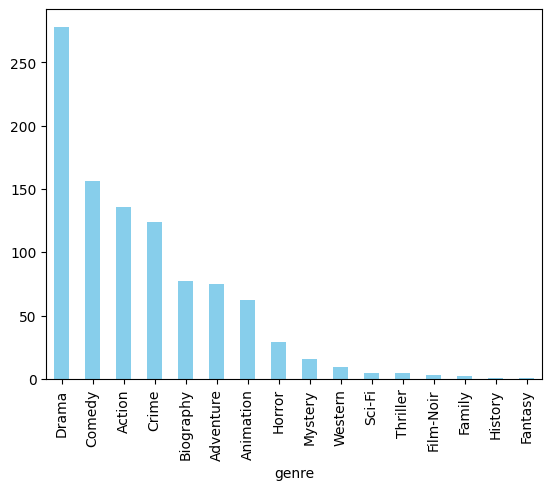

In [ ]:
counts = movies_df.genre.value_counts()
counts.plot(kind='bar', color='skyblue')

# import matplotlib.pyplot as plt
# plt.xlabel('Category')
# plt.ylabel('Count')
# plt.title('Value Counts of Categories')
# plt.show()

In [ ]:
movies_df.sort_values(by='star_rating', ascending=False).head()

,star_rating,content_rating,genre,duration,actors_list
title,,,,,
The Shawshank Redemption,9.3,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
The Godfather,9.2,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
The Godfather: Part II,9.1,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
The Dark Knight,9.0,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Pulp Fiction,8.9,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [ ]:
movies_df.sort_index().head()

,star_rating,content_rating,genre,duration,actors_list
title,,,,,
(500) Days of Summer,7.8,PG-13,Comedy,95,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
12 Angry Men,8.9,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
12 Years a Slave,8.1,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."
127 Hours,7.6,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
2001: A Space Odyssey,8.3,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."


### Clean Data
Missing data, Duplicated data, Outliers

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame({
    'apples': [3, 2, 0, 1],
    'bananas': [np.nan, 3, 7, 2],
    'oranges': [5, 4, 0, np.nan]
})
df

,apples,bananas,oranges
0,3,NaN,5.0
1,2,3.0,4.0
2,0,7.0,0.0
3,1,2.0,NaN


In [ ]:
df.isnull().sum()

,0
apples,0
bananas,1
oranges,1


In [ ]:
# Remove all rows with NULL values
df2 = df.dropna(inplace = False, axis=0)
df

,apples,bananas,oranges
0,3,NaN,5.0
1,2,3.0,4.0
2,0,7.0,0.0
3,1,2.0,NaN


Data imputation:

In [ ]:
# Data imputation: replace NULL values with column's mean
df["bananas"] = df["bananas"].fillna(df["bananas"].mean())

In [ ]:
df

,apples,bananas,oranges
0,3,4.0,5.0
1,2,3.0,4.0
2,0,7.0,0.0
3,1,2.0,NaN


#### Remove duplicate

In [ ]:
import pandas as pd

In [ ]:
df = pd.concat([df, pd.DataFrame([df.loc[3].values], columns=df.columns)],ignore_index=True)

NameError: name 'df' is not defined

In [ ]:
df

In [ ]:
print(df.duplicated().sum())
df.duplicated()

2


,0
0,False
1,False
2,False
3,False
4,True
5,True


In [ ]:
df.drop_duplicates(inplace = True)
df

,apples,bananas,oranges
0,3.0,NaN,5.0
1,2.0,3.0,4.0
2,0.0,7.0,0.0
3,1.0,2.0,NaN


#### Detect outliers

In [ ]:
df = ### ADD GOOD EXAMPLE HERE ###

In [ ]:
# Calculate percentiles
lower_percentile = df['col1'].quantile(0.01)
upper_percentile = df['col1'].quantile(0.99)

# Filter out the outliers
outliers = df[(df['col1'] < lower_percentile) | (df['col1'] > upper_percentile)]
print(outliers)


In [ ]:
import matplotlib.pyplot as plt

# Create a boxplot
plt.boxplot(df['col1'])
plt.show()


##### Z-score (scipy)

In [ ]:
from scipy import stats

# Compute Z-scores
df['zscore'] = stats.zscore(df['col1'])

# Define a threshold for outliers (usually > 3 or < -3)
outliers = df[(df['zscore'] > 3) | (df['zscore'] < -3)]
print(outliers)


### Process
Data processing


In [ ]:
df["bananas"] = df["bananas"] + 10
df['oranges'] = df['oranges']/2
df

,apples,bananas,oranges
0,3,14.0,2.5
1,2,13.0,2.0
2,0,17.0,0.0
3,1,12.0,NaN


Use string operations:

In [ ]:
df.bananas = df.bananas.astype(str)
df.bananas = df.bananas +'_hh'
df

,apples,bananas,oranges
0,3,nan_hh,5.0
1,2,3.0_hh,4.0
2,0,7.0_hh,0.0
3,1,2.0_hh,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   apples   4 non-null      int64  
 1   bananas  4 non-null      object 
 2   oranges  3 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 224.0+ bytes


Add new columns

In [ ]:
df['banans_length'] = df.bananas.str.len()
df['apples_max'] = df.apples.max()
df

,apples,bananas,oranges,banans_length,apples_max
0,3,14.0+hh_hh,5.0,10,3
1,2,13.0+hh_hh,4.0,10,3
2,0,17.0+hh_hh,0.0,10,3
3,1,12.0+hh_hh,NaN,10,3


In [ ]:
df.bananas.str.upper()

In [ ]:
# handle categorical features
df.edu = df.edu.replace({
    '6-10':1,
    '11-15':2,
    '16-20':3,
    ' ':np.nan
})

Handle dates

In [ ]:
df['date'] = ['01/10/2021', '02/02/2022','05/04/2022', '05/04/2023']
df

,apples,bananas,oranges,banans_length,apples_max,date
0,3,14.0+hh_hh,5.0,10,3,01/10/2021
1,2,13.0+hh_hh,4.0,10,3,02/02/2022
2,0,17.0+hh_hh,0.0,10,3,05/04/2022
3,1,12.0+hh_hh,NaN,10,3,05/04/2023


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   apples         4 non-null      int64         
 1   bananas        4 non-null      object        
 2   oranges        3 non-null      float64       
 3   banans_length  4 non-null      int64         
 4   apples_max     4 non-null      int64         
 5   date           4 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 320.0+ bytes


##### Rename columns

In [ ]:
df2 = df.rename(columns={'bananas':'BANANAS', 'apples': 'APPLES'}, inplace=False)
df.columns

Index(['APPLES', 'yellow_b', 'oranges'], dtype='object')

In [ ]:
df.columns = [col.lower() for col in df]
df.columns

Index(['apples', 'yellow_b', 'oranges'], dtype='object')

#### Elementwise operations

Apply a function on each element in a Series (row/col)

In [ ]:
dudes_cities.head()

Liam           New-York
Noah        Los-Angeles
Oliver          Chicago
William         Houston
James      Philadelphia
dtype: object

In [ ]:
def my_len(x):
    return len(x)
dudes_cities.apply(my_len).head()

Liam        8
Noah       11
Oliver      7
William     7
James      12
dtype: int64

In [ ]:
dudes_cities.apply(lambda x: len(x)).head()

Liam        8
Noah       11
Oliver      7
William     7
James      12
dtype: int64

#### Data indexing and selection

*pandas* supports two methods for indexing and selecting data:

* Label-based - implemented by the item-getter `.loc[]`
* integer-position-based - implemented by the item-getter `.iloc[]`

Another way to select data is via the standard item-getters of the form `s[label]`, `s.label` and `s[i]`. But its less recomanded (may be ambiguous)

For more complicated cases, check:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-and-selecting-data "indexing and selecting data"

In [ ]:
name_str = 'Liam Noah Oliver William James Benjamin Lucas Henry Alexander Mason Michael Ethan Daniel Jacob Logan Jackson Sebastian Mateo Jack Owen'
names = name_str.split()
cities_str = 'New-York Los-Angeles Chicago Houston Philadelphia Phoenix Indianapolis Dallas Philadelphia Jacksonville Charlotte Seattle Detroit Boston Memphis Nashville Portland Oklahoma Dallas Dallas'
cities = cities_str.split()


In [ ]:
dudes_cities = pd.Series(data=cities, index=names)
print(dudes_cities)

Liam             New-York
Noah          Los-Angeles
Oliver            Chicago
William           Houston
James        Philadelphia
Benjamin          Phoenix
Lucas        Indianapolis
Henry              Dallas
Alexander    Philadelphia
Mason        Jacksonville
Michael         Charlotte
Ethan             Seattle
Daniel            Detroit
Jacob              Boston
Logan             Memphis
Jackson         Nashville
Sebastian        Portland
Mateo            Oklahoma
Jack               Dallas
Owen               Dallas
dtype: object


##### _loc_ - Label-based indexing

see more at [Selection by Label][1]

[1]: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-label

In [ ]:
print(dudes_cities.loc[ ['Ethan', 'Jack', 'Henry'] ])

Ethan    Seattle
Jack      Dallas
Henry     Dallas
dtype: object


In [ ]:
# print(dudes_cities.loc['Ethan'])
# print(dudes_cities.loc['Jack'])
# print(dudes_cities.loc[ ['Ethan', 'Jack', 'Henry'] ])

We specifically note the `loc` option for **Boolean indexing**, which is similar to SQL's `WHERE` statement.

In [ ]:
print(dudes_cities.loc[dudes_cities.str.contains('ll')])

Henry            Dallas
Mason      Jacksonville
Jackson       Nashville
Jack             Dallas
Owen             Dallas
dtype: object


##### _iloc_ - Integer-location-based

see more at [Selection by Position][1]

[1]: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing-integer

In [ ]:
print(dudes_cities.iloc[4])

Philadelphia


In [ ]:
print(dudes_cities.iloc[ [0, 2] ])

Liam      New-York
Oliver     Chicago
dtype: object


In [ ]:
# print(dudes_cities.iloc[1])
print(dudes_cities.iloc[ [0, 2] ])

Liam      New-York
Oliver     Chicago
dtype: object


#### Combining DataFrames: merge, join, concat

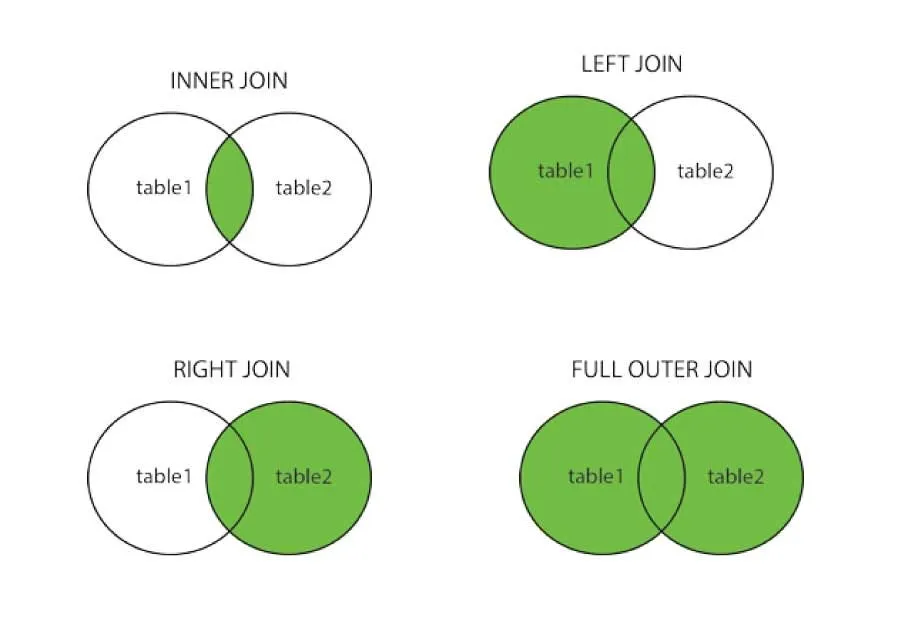

I really like this page: https://pandas.pydata.org/docs/user_guide/merging.html

In [ ]:
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)


df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)


df3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
    },
    index=[8, 9, 10, 11],
)


In [ ]:
df4 = pd.concat([df1, df2, df3])

In [ ]:
df4.shape

(12, 4)

In [ ]:
df5 = pd.concat([df1, df3], axis=1, join="outer")

In [ ]:
df5.head()

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,A8,B8,C8,D8


#### Aggregative functions on sub-groups
groupby one of pandas most powerful commands

In [ ]:
dudes_df = dudes_cities.to_frame(name="city").reset_index()
dudes_df['height'] = np.random.normal(175, 5, len(dudes_df))
dudes_df['weight'] = np.random.normal(75, 2.5, len(dudes_df))
dudes_df.head(3)

,index,city,height,weight
0,Liam,New-York,166.669688,72.996613
1,Noah,Los-Angeles,169.511866,74.395687
2,Oliver,Chicago,175.161525,75.184228


In [ ]:
dudes_df.groupby('city')['height'].mean() #std(), max(), min(),..

city
Boston          171.281091
Charlotte       173.367953
Chicago         175.161525
Dallas          173.640903
Detroit         178.976626
Houston         178.147578
Indianapolis    179.249885
Jacksonville    182.177630
Los-Angeles     169.511866
Memphis         174.159332
Nashville       167.870163
New-York        166.669688
Oklahoma        176.759463
Philadelphia    169.686593
Phoenix         179.777383
Portland        171.559839
Seattle         168.466217
Name: height, dtype: float64

<Axes: xlabel='city'>

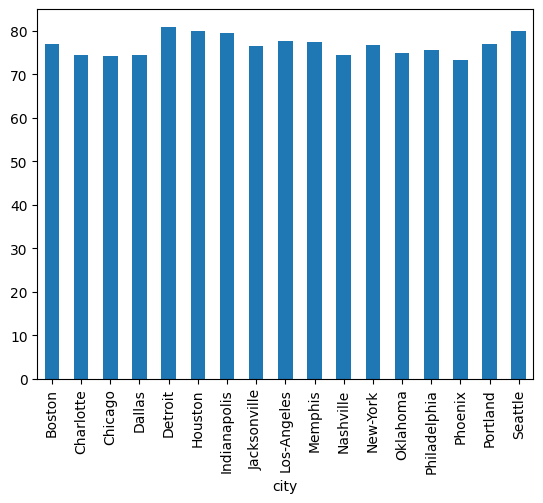

In [ ]:
dudes_df.groupby('city')['weight'].min().plot(kind='bar')

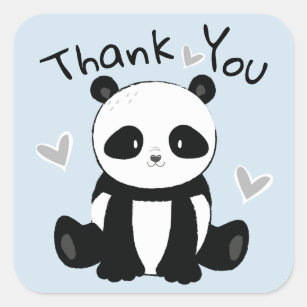

## More

### Save
Storing Dataframes

Pandas stores data in memory, but it does not provide persistent storage. Once the program stops, the data is lost. You need to explicitly save it. This is how:

#### CSV file:

In [ ]:
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 35],
        'Score': [85.5, 90.2, 88.1]}
df = pd.DataFrame(data)

# Save
df.to_csv('data.csv', index=False)

# Load
df_from_csv = pd.read_csv('data.csv')

print(df_from_csv)

      Name  Age  Score
0    Alice   25   85.5
1      Bob   30   90.2
2  Charlie   35   88.1


Why use csv?

- Plain text, readable by humans (opposed to HDF5 binary format)
- Much of the existing data is on csv
- Can be shared with use non-python tools/users

#### HDF5:

In [ ]:
# Save DataFrame to HDF5
df.to_hdf('data.h5', key='df', mode='w')

# Load DataFrame from HDF5
df_from_hdf = pd.read_hdf('data.h5', key='df')

print(df_from_hdf)


      Name  Age  Score
0    Alice   25   85.5
1      Bob   30   90.2
2  Charlie   35   88.1


Why use HDF5?

- Data is compresses data, reducing file size.
- Fast read/write
- Allows partial reading, no need to load the entire dataset when need only a part of it.
- Supports large datasets
- Maintain the data types of columns (e.g., integers, floats, strings)

#### Analyze:
Visualization: Examine relationship (correlation) between features

Easier with Pandas..

In [ ]:
import seaborn as sns

sns.heatmap(movies_df.corr(numeric_only=True), annot=True)

In [ ]:
sns.pairplot(movies_df, hue ='day')

## Visualization

Everything you know from matplotlib works here as well:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=";")

print("Original Data:")
print(df.head())

Original Data:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2    

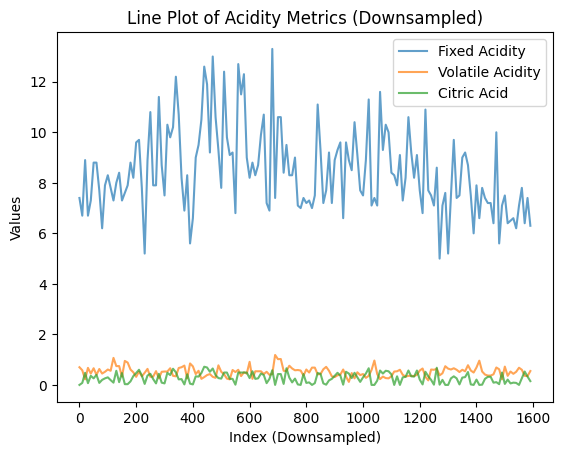

In [ ]:
downsample_factor = 10  # Adjust this factor to control how much you downsample
df_downsampled = df.iloc[::downsample_factor, :]

df_downsampled[['fixed acidity', 'volatile acidity', 'citric acid']].plot(kind='line', alpha=0.7)
plt.title("Line Plot of Acidity Metrics (Downsampled)")
plt.xlabel("Index (Downsampled)")
plt.ylabel("Values")
plt.legend(['Fixed Acidity', 'Volatile Acidity', 'Citric Acid'])
plt.show()


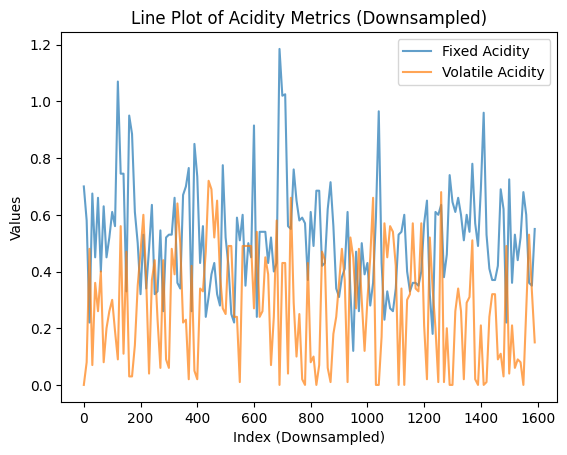

In [ ]:
df_downsampled[['volatile acidity', 'citric acid']].plot(kind='line', alpha=0.7)
plt.title("Line Plot of Acidity Metrics (Downsampled)")
plt.xlabel("Index (Downsampled)")
plt.ylabel("Values")
plt.legend(['Fixed Acidity', 'Volatile Acidity', 'Citric Acid'])
plt.show()

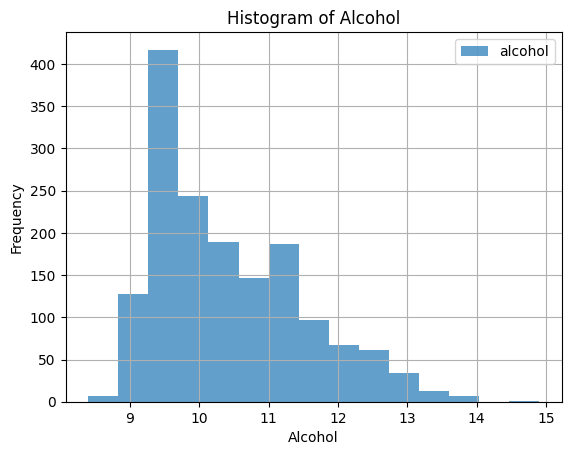

In [ ]:
df['alcohol'].hist(bins=15, alpha=0.7, label='alcohol')
plt.title("Histogram of Alcohol")
plt.xlabel("Alcohol")
plt.ylabel("Frequency")
plt.legend()
plt.show()

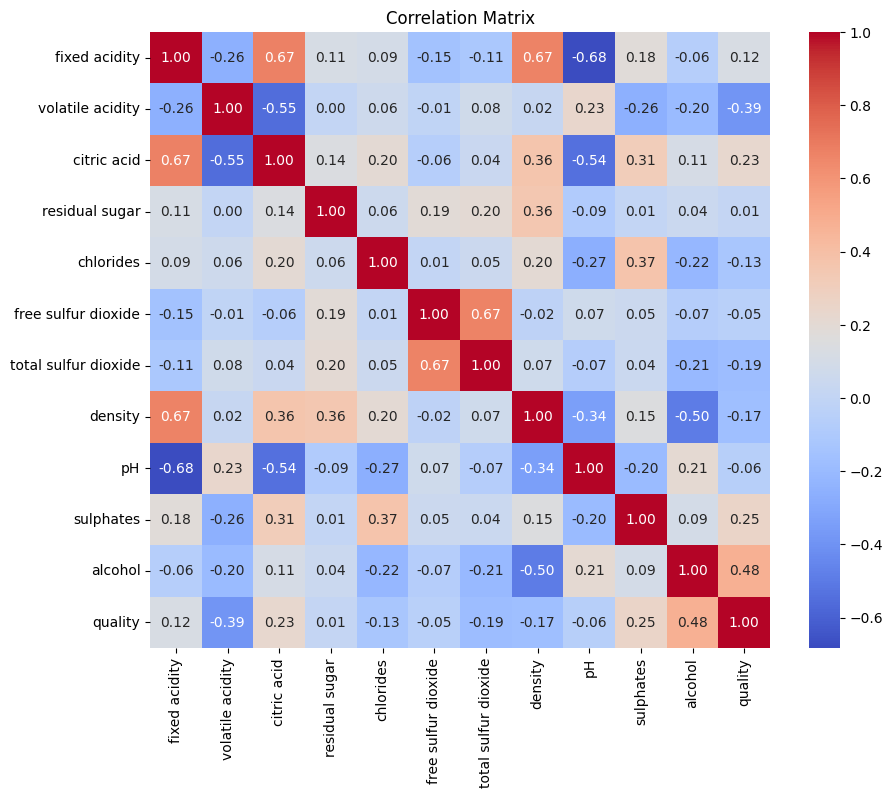

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

<Figure size 1200x1200 with 0 Axes>

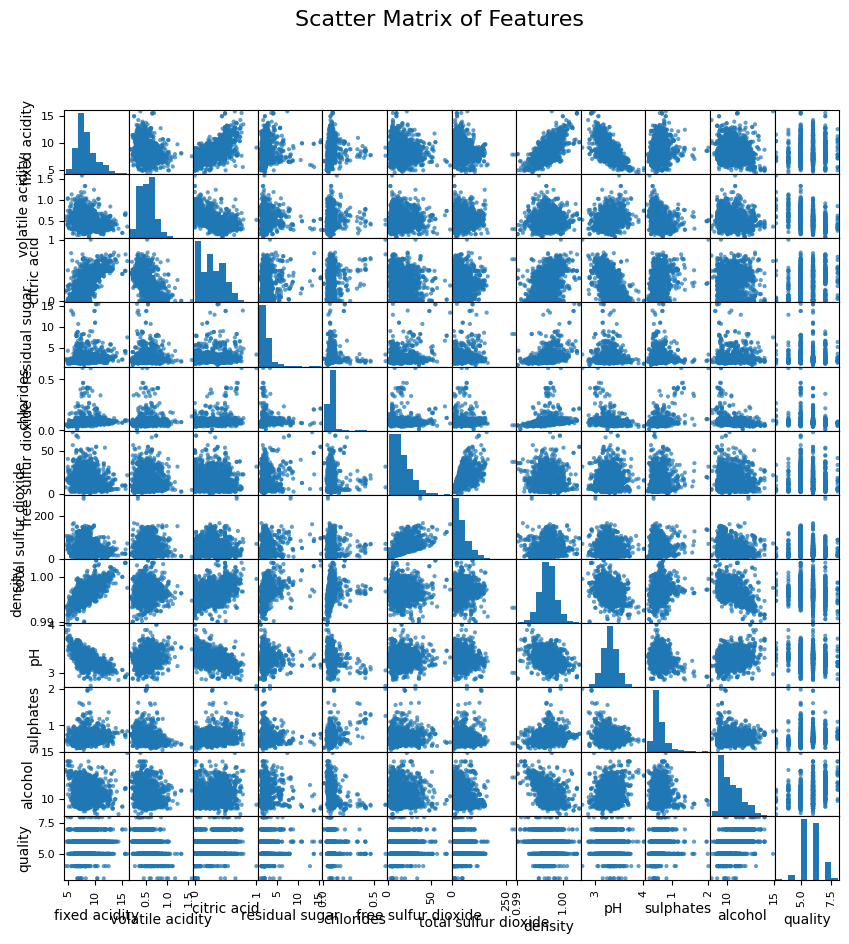

In [ ]:
from pandas.plotting import scatter_matrix
plt.figure(figsize=(12, 12))
scatter_matrix(df, figsize=(10, 10), alpha=0.7, diagonal='hist')

plt.suptitle("Scatter Matrix of Features", fontsize=16)
plt.show()

## More:

### Web scrapping

While Pandas does not perform the actual scraping (like requests or BeautifulSoup), we can use Pandas to read HTML tables directly from web pages, e.g.:

In [ ]:
import pandas as pd

url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables = pd.read_html(url)
print(f"Number of tables found: {len(tables)}")
gdp_table = tables[2]
print(gdp_table.head(7))

Number of tables found: 7
  Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  110047109       2024      105435540       2023   
1     United States   29167779       2024       27360935       2023   
2             China   18273357  [n 1]2024       17794782  [n 3]2023   
3           Germany    4710032       2024        4456081       2023   
4             Japan    4070094       2024        4212945       2023   
5             India    3889130       2024        3549919       2023   
6    United Kingdom    3587545       2024        3340032       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022  
5            3465541       2022  
6            3089072       2022  


,0
0,Largest economies in the world by GDP (nominal...


### Beyond Pandas: Handling large datasets

Pandas DataFrame is stored in memory --> the dataset can be as large as the computer's RAM (for me, 8GB)

#### Dask

Dask Dataframe:
Dask DataFrame helps process large tabular data by parallelizing pandas.

- Dask DataFrames are a collection of many pandas DataFrames.
- Large scale: Works on 100 GiB on a laptop, or 100 TiB on a cluster.

https://docs.dask.org/en/stable/dataframe.html

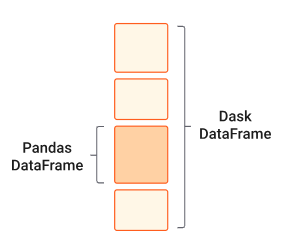

Lazy evaluation: Dask doesn't compute results until explicitly requested (with .compute()).

Out-of-core computation: Dask allows processing datasets too large to fit into memory by breaking them into smaller chunks.

Parallelism: Dask automatically splits the work among multiple CPU cores or across a cluster.

In [ ]:
import dask.array as da

# Create a large Dask array (larger than memory)
x = da.random.random((10000, 10000), chunks=(1000, 1000))

# Perform computations on the large array (e.g., sum) in parallel
result = x.sum().compute()
print(result)


49998185.1444204


In [ ]:
import dask.dataframe as dd

# Load a large CSV file using Dask DataFrame (bigger than available memory)
df = dd.read_csv('large_dataset.csv')

# same as pandas
df.head()

# Compute basic operations (will be parallelized)
mean_value = df['some_column'].mean().compute()
print("Mean:", mean_value)

# Filtering data and writing to another CSV file (parallelized)
filtered_df = df[df['some_column'] > 10]

filtered_df.to_csv('filtered_output.csv', single_file=True)


### For SQL native speakers: sqlalchemy

You can connect Pandas to a Database using SQLAlchemy

Syntax: pandas.DataFrame.to_sql(table_name, engine_name, if_exists, index)

Example using SQLite (an in-memory database, already built into Python, you don't need to install anything)

In [ ]:
import pandas as pd
from sqlalchemy import create_engine, text

# Create a dataframe
data = {'id': [1, 2, 3], 'name': ['Alice', 'Bob', 'Charlie'], 'age': [25, 30, 35]}
df = pd.DataFrame(data)

# Create SQLite database
engine = create_engine('sqlite:///:memory:')

# Store the DataFrame as a table in the SQLite database
df.to_sql('users', engine, index=False, if_exists='replace')

# Query the database
with engine.connect() as connection:
    query = text("SELECT * FROM users WHERE age > 30") # convert the SQL query into an executable statement
    result = connection.execute(query)
    queried_df = pd.DataFrame(result.fetchall(), columns=result.keys())

print(queried_df)


   id     name  age
0   3  Charlie   35
